In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [2]:
fraud=pd.read_csv('Fraud_check.csv')
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [3]:
fraud.shape

(600, 6)

In [4]:
fraud.dtypes

Undergrad          object
Marital.Status     object
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban              object
dtype: object

In [5]:
fraud.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
le=LabelEncoder()

In [8]:
fraud['Undergrad']=le.fit_transform(fraud['Undergrad'])
fraud['Marital.Status']=le.fit_transform(fraud['Marital.Status'])
fraud['Urban']=le.fit_transform(fraud['Urban'])

In [9]:
fraud

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,68833,50047,10,1
1,1,0,33700,134075,18,1
2,0,1,36925,160205,30,1
3,1,2,50190,193264,15,1
4,0,1,81002,27533,28,0
...,...,...,...,...,...,...
595,1,0,76340,39492,7,1
596,1,0,69967,55369,2,1
597,0,0,47334,154058,0,1
598,1,1,98592,180083,17,0


In [10]:
fraud['tax_catagory']=''

In [11]:
fraud.dtypes

Undergrad           int32
Marital.Status      int32
Taxable.Income      int64
City.Population     int64
Work.Experience     int64
Urban               int32
tax_catagory       object
dtype: object

In [12]:
for i in range(len(fraud['Taxable.Income'])):
    if fraud['Taxable.Income'][i]<= 30000:
        fraud['tax_catagory'][i]="risky"
    else :
        fraud['tax_catagory'][i]="good"
    

In [13]:
fraud.head(15)

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban,tax_catagory
0,0,2,68833,50047,10,1,good
1,1,0,33700,134075,18,1,good
2,0,1,36925,160205,30,1,good
3,1,2,50190,193264,15,1,good
4,0,1,81002,27533,28,0,good
5,0,0,33329,116382,0,0,good
6,0,0,83357,80890,8,1,good
7,1,2,62774,131253,3,1,good
8,0,2,83519,102481,12,1,good
9,1,0,98152,155482,4,1,good


In [14]:
for i in range(len(fraud['tax_catagory'])):
    if fraud['tax_catagory'][i] == "risky":
        fraud['tax_catagory'][i] = 0
    else :
         fraud['tax_catagory'][i] = 1
         
        

In [15]:
fraud["tax_catagory"] = fraud["tax_catagory"].astype("int")

In [16]:
fraud1=fraud.drop(['Taxable.Income'],axis=1)

In [17]:
x=fraud1.drop(['tax_catagory'],axis=1)
y=fraud1[['tax_catagory']]

In [18]:
x.shape,y.shape

((600, 5), (600, 1))

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)

In [20]:
x_train.shape,y_train.shape

((480, 5), (480, 1))

In [21]:
x_test.shape,y_test.shape

((120, 5), (120, 1))

In [22]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [23]:
y_pred=dt_model.predict(x_test)
y_pred_train=dt_model.predict(x_train)

In [24]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

In [25]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.09      0.23      0.13        13
           1       0.88      0.70      0.78       107

    accuracy                           0.65       120
   macro avg       0.48      0.47      0.45       120
weighted avg       0.80      0.65      0.71       120



In [26]:
confusion_matrix(y_test,y_pred)

array([[ 3, 10],
       [32, 75]], dtype=int64)

In [27]:
accuracy_score(y_test,y_pred)

0.65

<AxesSubplot:>

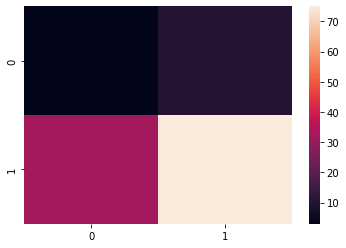

In [28]:
cc=confusion_matrix(y_test,y_pred)
sns.heatmap(confusion_matrix(y_test,y_pred))

In [29]:
auc_train=roc_auc_score(y_train,y_pred_train)
auc_train

1.0

In [30]:
auc_test=roc_auc_score(y_test,y_pred)
auc_test

0.4658519051042415

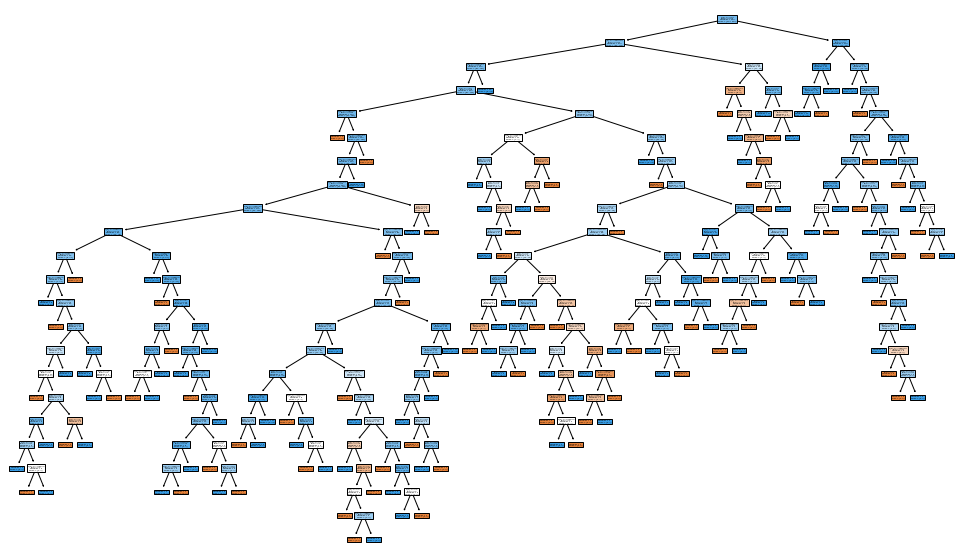

In [31]:
from matplotlib import pyplot as plt
from sklearn import tree
plt.figure(figsize=(17,10))
tree.plot_tree(dt_model,filled=True)
plt.show()


Text(0, 0.5, 'true positive rate')

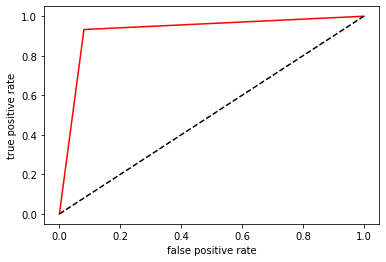

In [32]:
fpr,tpr,threshold=roc_curve(y,dt_model.predict_proba(x)[:,1])

plt.plot(fpr,tpr,color='red')
plt.plot([0, 1],[0, 1],'k--')
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')

# gridsearchcv

In [33]:
from sklearn.model_selection import GridSearchCV
grid_data=GridSearchCV(estimator=dt_model,param_grid={'criterion':['gini','entropy'],
                                                     'max_depth':[1,2,3,4,5,6,7,8],
                                                     'min_samples_split':[2,4,6,8],
                                                        'min_samples_leaf':[1,2,3,4]})
                                                                  
grid_data.fit(x_train,y_train)                                                                  
print(grid_data.best_params_ )                                                            
print(grid_data.best_score_ )                                                           

{'criterion': 'entropy', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.76875


In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dt_model_2=DecisionTreeClassifier(criterion='entropy',max_depth=2)

In [36]:
dt_model_2.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2)

In [37]:
yp_train2=dt_model_2.predict(x_train)
yp_test2=dt_model_2.predict(x_test)

In [38]:
accuracy_score(y_test,yp_test2)

0.8916666666666667

In [40]:
print(classification_report(y_test,yp_test2))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        13
           1       0.89      1.00      0.94       107

    accuracy                           0.89       120
   macro avg       0.45      0.50      0.47       120
weighted avg       0.80      0.89      0.84       120



In [41]:
confusion_matrix(y_test,yp_test2)

array([[  0,  13],
       [  0, 107]], dtype=int64)

In [42]:
roc_auc_score(y_test,yp_test2)

0.5

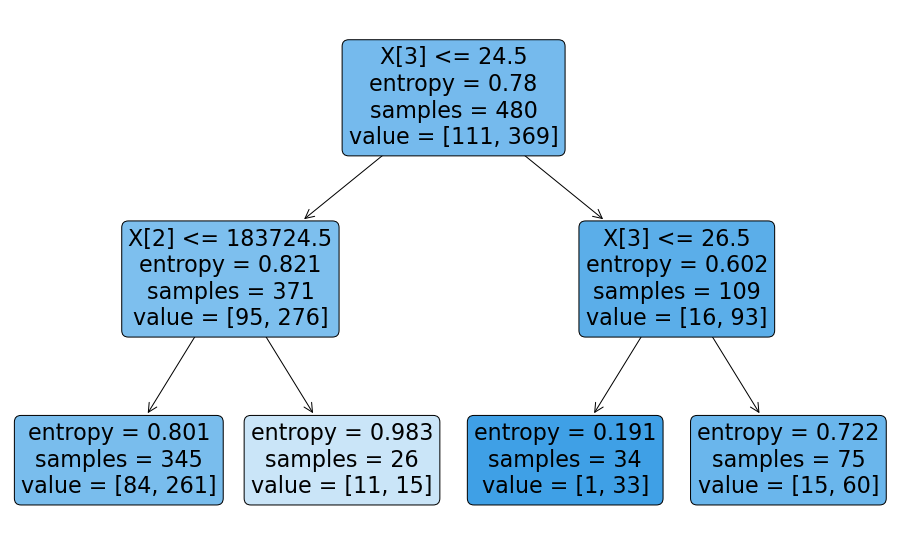

In [50]:
plt.figure(figsize=(16,10))
tree.plot_tree(dt_model_2,filled=True,rounded=True)
plt.show()

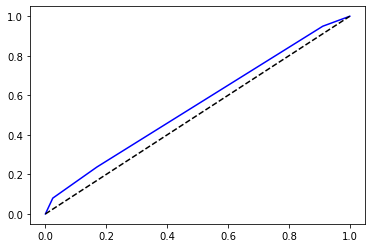

In [53]:
fpr,tpr,threshold=roc_curve(y,dt_model_2.predict_proba(x)[:,1])
plt.plot(fpr,tpr,color='blue')
plt.plot([0,1],[0,1],'k--')

here we are going to check imbalanced datas

In [54]:
fraud1['tax_catagory'].value_counts()

1    476
0    124
Name: tax_catagory, dtype: int64

<AxesSubplot:xlabel='tax_catagory', ylabel='count'>

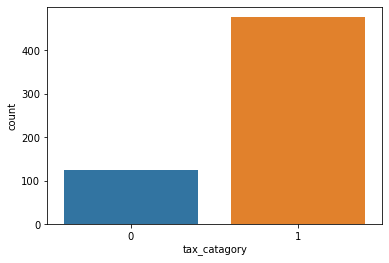

In [55]:
sns.countplot(fraud1['tax_catagory'])

Countplot clearly shows that, the data are highly imbalanced, it may affect the accuaracy of the model

It need to be balanced for obtaining best model

In [65]:
# data adjusted by class wieght

In [71]:
dt_model3=DecisionTreeClassifier(class_weight={0:1,1:5}).fit(x_train,y_train)

In [72]:
yp_test3=dt_model3.predict(x_test)

In [73]:
accuracy_score(y_test,yp_test3)

0.625

so our accuracy score is improved becuase of balancing the data